In [1]:
# Importing The Library
import networkx as nx
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Reading the csv file using Pandas
df = pd.read_csv("Q1.csv")

In [3]:
df.head()

,source,target
0,Betty,Cindy
1,Betty,David
2,Betty,Fred
3,Betty,Adam
4,Cindy,Betty


In [4]:
# Creating graph using nextworkx and pandas edge list
G = nx.from_pandas_edgelist(df,create_using=nx.Graph())

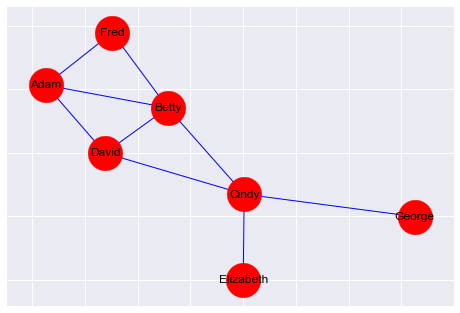

In [5]:
# Representation of graph
nx.draw_networkx(G,with_labels=True,node_color='red',node_size=1200,edge_color='blue')

In [6]:
# Getting all nodes in sorted fashion
field_names = [" "]
field_names.extend(sorted(G.nodes))

In [7]:
print("Geodesic Distance:")

geo_dist = dict(nx.all_pairs_shortest_path_length(G))

pt = PrettyTable()
pt.field_names = field_names

# Using Pretty Table of sorted dict of dict to create table of shortest Distance
for key in sorted(geo_dist):
    values = [key]
    for k in sorted(geo_dist[key]):
        values.append(geo_dist[key][k])
    pt.add_row(values)
print(pt)

Geodesic Distance:
+-----------+------+-------+-------+-------+-----------+------+--------+
|           | Adam | Betty | Cindy | David | Elizabeth | Fred | George |
+-----------+------+-------+-------+-------+-----------+------+--------+
|    Adam   |  0   |   1   |   2   |   1   |     3     |  1   |   3    |
|   Betty   |  1   |   0   |   1   |   1   |     2     |  1   |   2    |
|   Cindy   |  2   |   1   |   0   |   1   |     1     |  2   |   1    |
|   David   |  1   |   1   |   1   |   0   |     2     |  2   |   2    |
| Elizabeth |  3   |   2   |   1   |   2   |     0     |  3   |   2    |
|    Fred   |  1   |   1   |   2   |   2   |     3     |  0   |   3    |
|   George  |  3   |   2   |   1   |   2   |     2     |  3   |   0    |
+-----------+------+-------+-------+-------+-----------+------+--------+


In [8]:
print("Eccentricity : ")
ecc = nx.eccentricity(G)
ecc

Eccentricity : 


{'Betty': 2,
 'Cindy': 2,
 'David': 2,
 'Fred': 3,
 'Adam': 3,
 'Elizabeth': 3,
 'George': 3}

In [9]:
print("Average path Length :",nx.average_shortest_path_length(G))

Average path Length : 1.7619047619047619


In [10]:
print("Diameter :",nx.diameter(G))

Diameter : 3


In [11]:
degree = G.degree()
_degree = [y for x,y in degree]
print("Average Degree :",sum(_degree)/len(_degree))

Average Degree : 2.5714285714285716


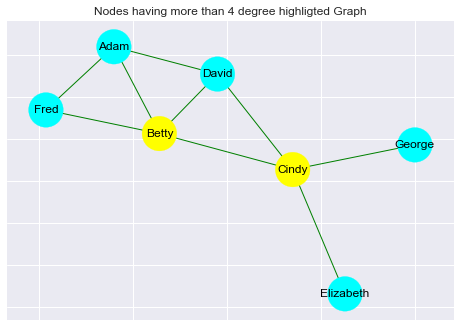

In [12]:
color = [] 
for _,i in degree:
    if i>=4:
        color.append('yellow')
    else:
        color.append('cyan')

nx.draw_networkx(G,with_labels=True,node_color=color,node_size=1200,edge_color='green')
plt.title("Nodes having more than 4 degree highligted Graph")
plt.show()